In [1]:
import json
import pandas as pd
import re

#File paths
input_file = 'C:\\Users\\rohit\\Desktop\\HiWi\Work\\Radar Sensor Project\\py_mmwave_dev\\py_mmwave_plot\\vis_node_x_mmwave_sensor_20240723_163759.txt'

match = re.search(r'sensor_(\d{8}_\d{6})', input_file)
if match:
    timestamp_part = match.group(1)
else:
    raise ValueError("No timestamp found in the input file path")

output_file = f'{timestamp_part}_parsed_data.csv'


#Initializing
data_list = []

#Read data file and parse the JSON data
with open(input_file, 'r') as file:
    for line in file:
        data = json.loads(line.strip())
        timestamp = data['timestamp']
        numObj = data['numObj']
        
        # Create a row for each object
        for i in range(numObj):
            row = {
                'timestamp': timestamp,
                'range': data['range'][i],
                'azimuth': data['azimuth'][i],
                'elevation': data['elevation'][i],
                'x': data['x'][i],
                'y': data['y'][i],
                'z': data['z'][i],
                'v': data['v'][i],
                'snr': data['snr'][i],
                'rangeProfile': data['rangeProfile'],
            }
            data_list.append(row)

#Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data_list)

#Displaying the DataFrame
print(df.head())

#CSV output of DataFrame
df.to_csv(output_file, index=False)

print("Finished")


      timestamp     range    azimuth  elevation      x      y      z    v  \
0  1.721745e+09  0.087407 -69.904769   2.622936 -0.082  0.030  0.004  0.0   
1  1.721745e+09  2.180327   7.746056  21.723507  0.273  2.007  0.807  0.0   
2  1.721745e+09  2.354353   3.697049  14.462728  0.147  2.275  0.588  0.0   
3  1.721745e+09  2.528957   7.293466  10.180669  0.316  2.469  0.447  0.0   
4  1.721745e+09  2.747547   3.598506   4.132562  0.172  2.735  0.198  0.0   

    snr                                       rangeProfile  
0  43.3  [26.058, 33.348, 36.469, 35.841, 31.624, 25.27...  
1  29.2  [26.058, 33.348, 36.469, 35.841, 31.624, 25.27...  
2  26.9  [26.058, 33.348, 36.469, 35.841, 31.624, 25.27...  
3  27.7  [26.058, 33.348, 36.469, 35.841, 31.624, 25.27...  
4  13.2  [26.058, 33.348, 36.469, 35.841, 31.624, 25.27...  
Finished


In [2]:
print(df.timestamp)
print(df.range)
print(df.azimuth)

0        1.721745e+09
1        1.721745e+09
2        1.721745e+09
3        1.721745e+09
4        1.721745e+09
             ...     
23930    1.721746e+09
23931    1.721746e+09
23932    1.721746e+09
23933    1.721746e+09
23934    1.721746e+09
Name: timestamp, Length: 23935, dtype: float64
0        0.087407
1        2.180327
2        2.354353
3        2.528957
4        2.747547
           ...   
23930    4.665575
23931    5.145959
23932    6.628483
23933    6.671518
23934    8.198332
Name: range, Length: 23935, dtype: float64
0       -69.904769
1         7.746056
2         3.697049
3         7.293466
4         3.598506
           ...    
23930     0.000000
23931     0.000000
23932    -9.002771
23933    -9.002597
23934     3.625776
Name: azimuth, Length: 23935, dtype: float64


### Visualizing: Heatmap ### 

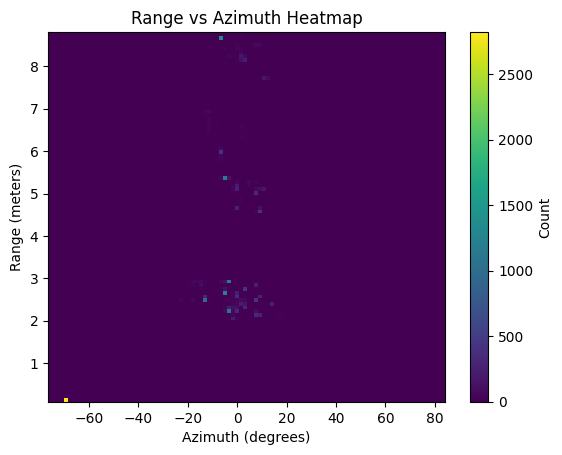

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Plotting the heatmap
#plt.figure(figsize=(10, 6))


plt.hist2d(df['azimuth'], df['range'], bins=[100, 100], cmap='viridis')

plt.colorbar(label='Count')

#Labels
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Range (meters)')
plt.title('Range vs Azimuth Heatmap')

plt.show()


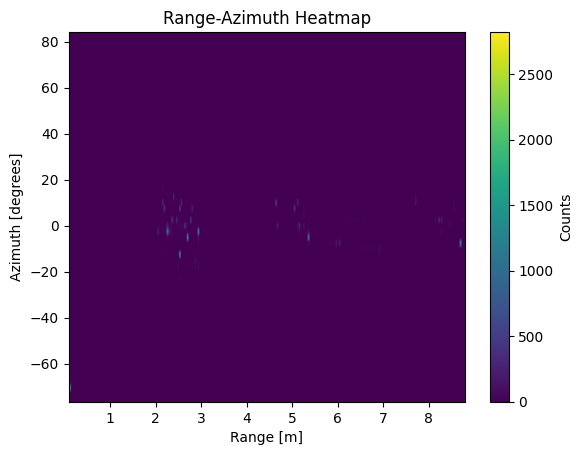

In [4]:
# Create 2D histogram
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(256, 64))

# Plot the heatmap
#fig, ax = plt.subplots(figsize=(10, 8))
fig, ax = plt.subplots()
cax = ax.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# Add color bar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Counts')

# Set labels
ax.set_xlabel('Range [m]')
ax.set_ylabel('Azimuth [degrees]')
ax.set_title('Range-Azimuth Heatmap')

plt.show()

ValueError: different number of values and points

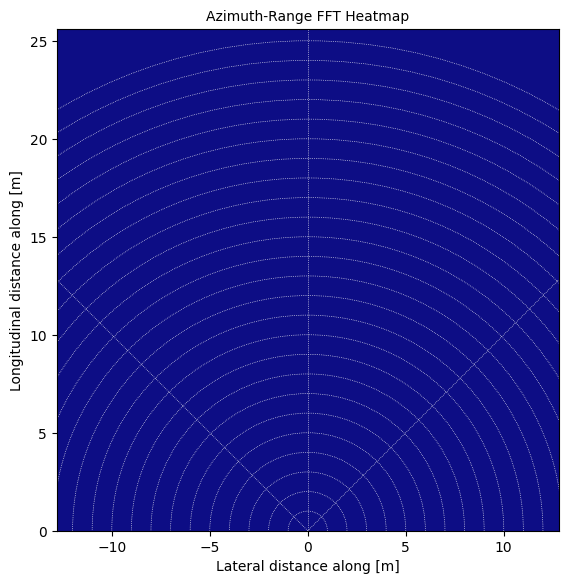

In [5]:
import numpy as np
import pandas as pd
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.widgets as wgt

# Assuming df is your DataFrame already loaded
# Example:
# df = pd.read_csv('path_to_your_dataframe.csv') # Uncomment if you need to read the DataFrame from a CSV file

# Parameters (Adjust these based on your requirements)
tx_azimuth_antennas = 4
rx_antennas = 4
range_bins = 256
angle_bins = 64
range_res = 0.1  # Adjust based on your data
range_bias = 0

# Create 2D grid for interpolation
t = np.array(range(-angle_bins//2 + 1, angle_bins//2)) * (2 / angle_bins)
t = np.arcsin(t)
r = np.array(range(range_bins)) * range_res

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

x = np.array([r]).T * np.sin(t)
y = np.array([r]).T * np.cos(t)
y = y - range_bias

# Plotting
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(((0,)*grid_res,) * grid_res, cmap=plt.cm.jet, extent=[-range_width, +range_width, 0, range_depth], alpha=0.95)

cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap'.format(angle_bins, range_bins), fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

ax.set_ylim([0, +range_depth])
ax.set_xlim([-range_width, +range_width])

for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

# Prepare data for heatmap
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(grid_res, grid_res))

# Interpolate data
zi = spi.griddata((x.ravel(), y.ravel()), heatmap.ravel(), (xi, yi), method='linear')
zi = zi[:-1, :-1]

cm.set_array(zi[::-1, ::-1])  # Rotate 180 degrees
cm.autoscale()  # Reset colormap

# Show plot
plt.show()




In [6]:
print(df.size)
print(df.azimuth.size)
print(df.range.size)

239350
23935
23935


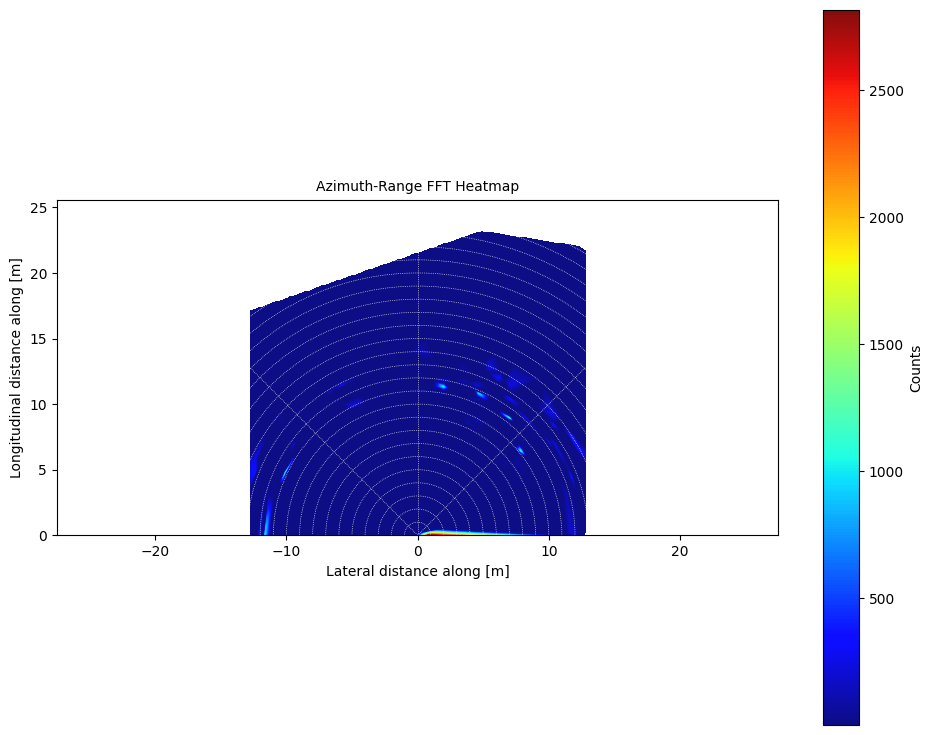

In [ ]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import matplotlib.widgets as wgt
import matplotlib.patches as pat

# Parameters
tx_azimuth_antennas = 4  
rx_antennas = 3  
range_bins = 256
angle_bins = 64
range_res = 0.1  
range_bias = 0.0 

# Calculate coordinates
t = np.linspace(-1, 1, angle_bins)
t = np.arcsin(t)
r = np.linspace(0, range_bins * range_res, range_bins)

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

#x and y for bins
x = np.outer(r, np.sin(t))
y = np.outer(r, np.cos(t))
y = y - range_bias

#2D histogram
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(range_bins, angle_bins))

#interpolation
x_points = x.ravel()
y_points = y.ravel()
values = heatmap.T.ravel()

#zero values filtered
mask = values > 0
x_points = x_points[mask]
y_points = y_points[mask]
values = values[mask]

zi = spi.griddata((x_points, y_points), values, (xi, yi), method='linear')
zi = zi[:-1, :-1]

#plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(zi[::-1, ::-1], cmap=plt.cm.jet, extent=[-range_width, range_width, 0, range_depth], alpha=0.95)
cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap'.format(angle_bins, range_bins), fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

#grid lines
ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

#range circles
for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

plt.colorbar(cm, ax=ax, label='Counts')
plt.show()



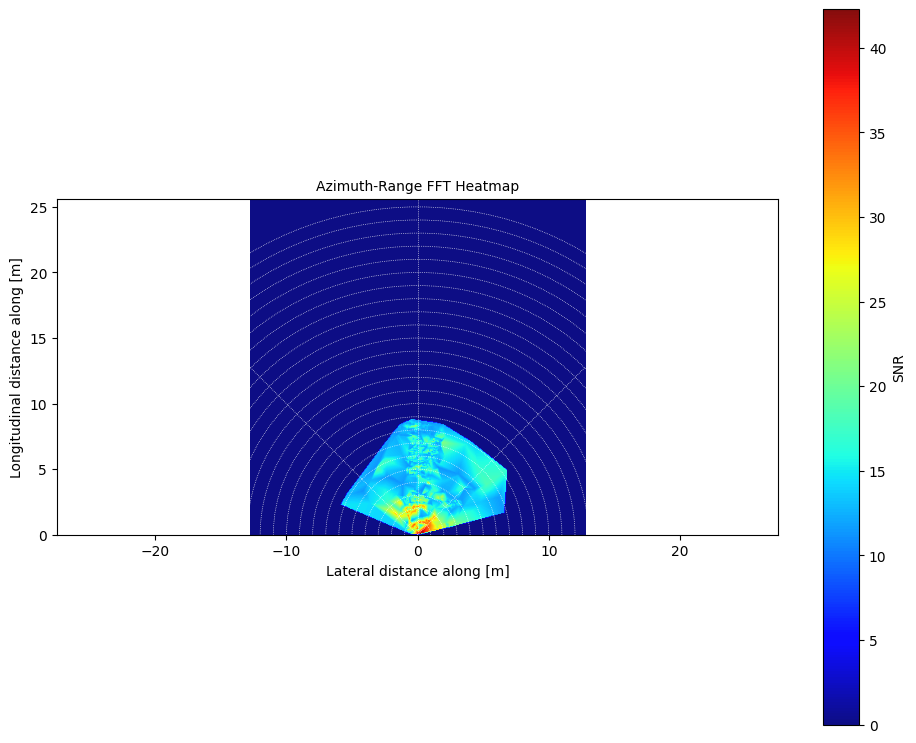

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import scipy.interpolate as spi
import pandas as pd  


# Parameters
tx_azimuth_antennas = 4  
rx_antennas = 4  
range_bins = 256
angle_bins = 64
range_res = 0.1  
range_bias = 0.0 

# Calculate coordinates
t = np.linspace(-1, 1, angle_bins)
t = np.arcsin(t)
r = np.linspace(0, range_bins * range_res, range_bins)

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

# x and y for bins
x = np.outer(r, np.sin(t))
y = np.outer(r, np.cos(t))
y = y - range_bias

# Interpolation
azimuth_radians = np.radians(df['azimuth'])
x_points = df['range'] * np.sin(azimuth_radians)
y_points = df['range'] * np.cos(azimuth_radians)
values = df['snr']

# Interpolate SNR values
zi = spi.griddata((x_points, y_points), values, (xi, yi), method='linear')
zi = np.nan_to_num(zi)  # Replace NaN values with zero

# Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(zi[::-1, ::-1], cmap=plt.cm.jet, extent=[-range_width, range_width, 0, range_depth], alpha=0.95)
cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap', fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

# Grid lines
ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

# Range circles
for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

# Colorbar for SNR values
plt.colorbar(cm, ax=ax, label='SNR')
plt.show()